In [6]:
# Importing the Packages

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl

In [7]:
# Reading the Data

general_location_df = pd.read_csv('data\RaCa_general_location.csv')

In [8]:
# Creating a GeoDataFrame from a DataFrame by creating a new column geomtry and setting a CRS value to it. 

general_location_df['geometry'] = [Point(x,y) for x,y in zip(general_location_df['Gen_long'], general_location_df['Gen_lat'])]
general_location_gdf = gpd.GeoDataFrame(data=general_location_df, geometry=general_location_df['geometry'])
general_location_gdf.drop(columns=['Gen_lat', 'Gen_long'], inplace=True)
general_location_gdf.set_crs(epsg=4269, inplace=True)

,RaCA_Id,geometry
0,C0107F02,POINT (-124.65000 48.27000)
1,C0104F05,POINT (-124.52000 47.92000)
2,C0104F09,POINT (-124.50000 47.90000)
3,C0120P02,POINT (-124.49000 42.80000)
4,C0104F03,POINT (-124.48000 46.80000)
...,...,...
6400,C0606W02,POINT (-110.77000 39.46000)
6401,C0604W05,POINT (-110.99000 39.21000)
6402,C0118F04,POINT (-122.55000 44.75000)
6403,C0114F06,POINT (-122.88000 44.46000)


In [9]:
general_location_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [10]:
base_map_1 = KeplerGl(height=600, width=800)
base_map_1.add_data(data=general_location_gdf.copy(), name = 'area_of_interest')
base_map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'area_of_interest': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…

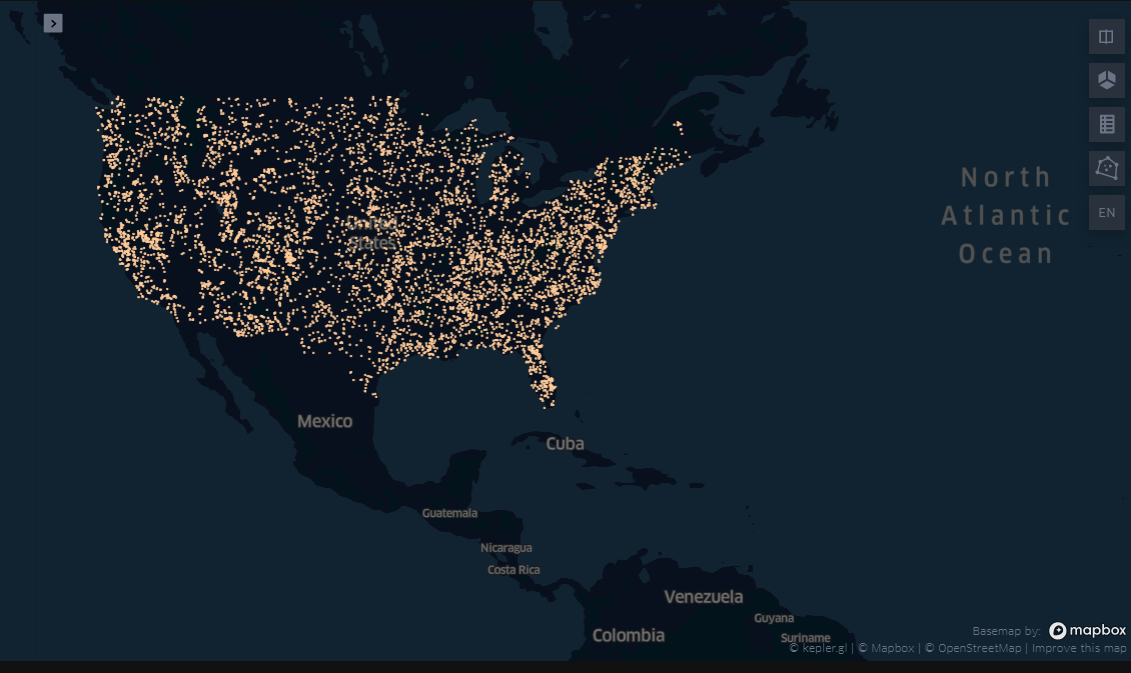

### **`Conclusion:`** - As we can see in the KeplerGL the points and the dataset is for the United States of America

In [13]:
general_location_gdf.to_file(filename=r'processed_data\general_location_processed.geojson', driver='GeoJSON')